<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import json
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import gym

from evsim.rl import DDQN
from evsim.simulation import Simulation, SimulationConfig
from evsim.controller import Controller, strategy

logger = logging.getLogger(__name__)

Using TensorFlow backend.


In [3]:
def visualize_log(filename, figsize=None, output=None):
    with open(filename, 'r') as f:
        data = json.load(f)
    if 'episode' not in data:
        raise ValueError('Log file "{}" does not contain the "episode" key.'.format(filename))
    episodes = data['episode']

    # Get value keys. The x axis is shared and is the number of episodes.
    keys = sorted(list(set(data.keys()).difference(set(['episode']))))

    if figsize is None:
        figsize = (15., 5. * len(keys))
    f, axarr = plt.subplots(len(keys), sharex=True, figsize=figsize)
    for idx, key in enumerate(keys):
        axarr[idx].plot(episodes, data[key])
        axarr[idx].set_ylabel(key)
    plt.xlabel('episodes')
    plt.tight_layout()
    if output is None:
        plt.show()
    else:
        plt.savefig(output)

        
def setup_logger(name, write=True):
    f = logging.Formatter("%(levelname)-7s %(message)s")

    sh = logging.StreamHandler()
    sh.setFormatter(f)
    sh.setLevel(logging.ERROR)
    handlers = [sh]

    if write:
        os.makedirs("./logs", exist_ok=True)
        fh = logging.FileHandler("./logs/%s.log" % name, mode="w")
        fh.setFormatter(f)
        fh.setLevel(logging.DEBUG)
        handlers = [sh, fh]

    logging.basicConfig(
        level=logging.DEBUG, datefmt="%d.%m. %H:%M:%S", handlers=handlers
    )

In [4]:
episode_steps = 6429

setup_logger("FleetSim-RL", write=False)
env = gym.make("evsim-v0") 

env.imbalance_costs(8000)

dqqn = DDQN(env, memory_limit=50000, nb_eps=50000, nb_warmup=1000)
dqqn.run(10 * episode_steps)

Instructions for updating:
Colocations handled automatically by placer.
Training for 64290 steps ...


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


Instructions for updating:
Use tf.cast instead.
  6429/64290: episode: 1, duration: 161.781s, episode steps: 6429, steps per second: 40, episode reward: -578806.150, mean reward: -90.031 [-64798.470, 91.960], mean action: 60.249 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 926612.702029, mean_absolute_error: 800.074697, mean_q: 944.655366, mean_eps: 0.933139


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 12858/64290: episode: 2, duration: 162.031s, episode steps: 6429, steps per second: 40, episode reward: -678722.940, mean reward: -105.572 [-45928.910, 113.720], mean action: 58.245 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 1217143.152029, mean_absolute_error: 7097.903360, mean_q: 7691.866022, mean_eps: 0.826426


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 19287/64290: episode: 3, duration: 166.336s, episode steps: 6429, steps per second: 39, episode reward: -463015.450, mean reward: -72.020 [-32520.890, 110.400], mean action: 59.479 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 1075511.567206, mean_absolute_error: 11415.570654, mean_q: 11958.799776, mean_eps: 0.710704


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 25716/64290: episode: 4, duration: 181.078s, episode steps: 6429, steps per second: 36, episode reward: -416530.510, mean reward: -64.789 [-62100.140, 148.080], mean action: 59.821 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 862193.254313, mean_absolute_error: 10071.302289, mean_q: 10435.373797, mean_eps: 0.594982


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 32145/64290: episode: 5, duration: 178.340s, episode steps: 6429, steps per second: 36, episode reward: -679256.730, mean reward: -105.655 [-70197.260, 29.030], mean action: 61.355 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 847334.829093, mean_absolute_error: 6915.994722, mean_q: 7171.133812, mean_eps: 0.479260


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 38574/64290: episode: 6, duration: 184.478s, episode steps: 6429, steps per second: 35, episode reward: -476476.770, mean reward: -74.114 [-80998.690, 77.430], mean action: 60.355 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 834805.003784, mean_absolute_error: 4815.128053, mean_q: 5028.825420, mean_eps: 0.363538


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 45003/64290: episode: 7, duration: 174.312s, episode steps: 6429, steps per second: 37, episode reward: -409408.020, mean reward: -63.681 [-35099.690, 92.170], mean action: 59.014 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 895826.897689, mean_absolute_error: 4116.510251, mean_q: 4337.253917, mean_eps: 0.247816


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 51432/64290: episode: 8, duration: 177.984s, episode steps: 6429, steps per second: 36, episode reward: -432802.470, mean reward: -67.320 [-26998.680, 147.870], mean action: 60.595 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 781681.523732, mean_absolute_error: 4178.452428, mean_q: 4389.626286, mean_eps: 0.134963


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 57861/64290: episode: 9, duration: 175.611s, episode steps: 6429, steps per second: 37, episode reward: -149298.930, mean reward: -23.223 [-43193.190, 102.160], mean action: 62.918 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 752205.740653, mean_absolute_error: 4238.057862, mean_q: 4449.377284, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 64290/64290: episode: 10, duration: 176.756s, episode steps: 6429, steps per second: 36, episode reward: -408831.180, mean reward: -63.592 [-32398.110, 72.450], mean action: 63.083 [0.000, 120.000], mean observation: 11.504 [0.000, 23.000], loss: 621470.368033, mean_absolute_error: 3979.936634, mean_q: 4177.670935, mean_eps: 0.100000
done, took 1738.934 seconds


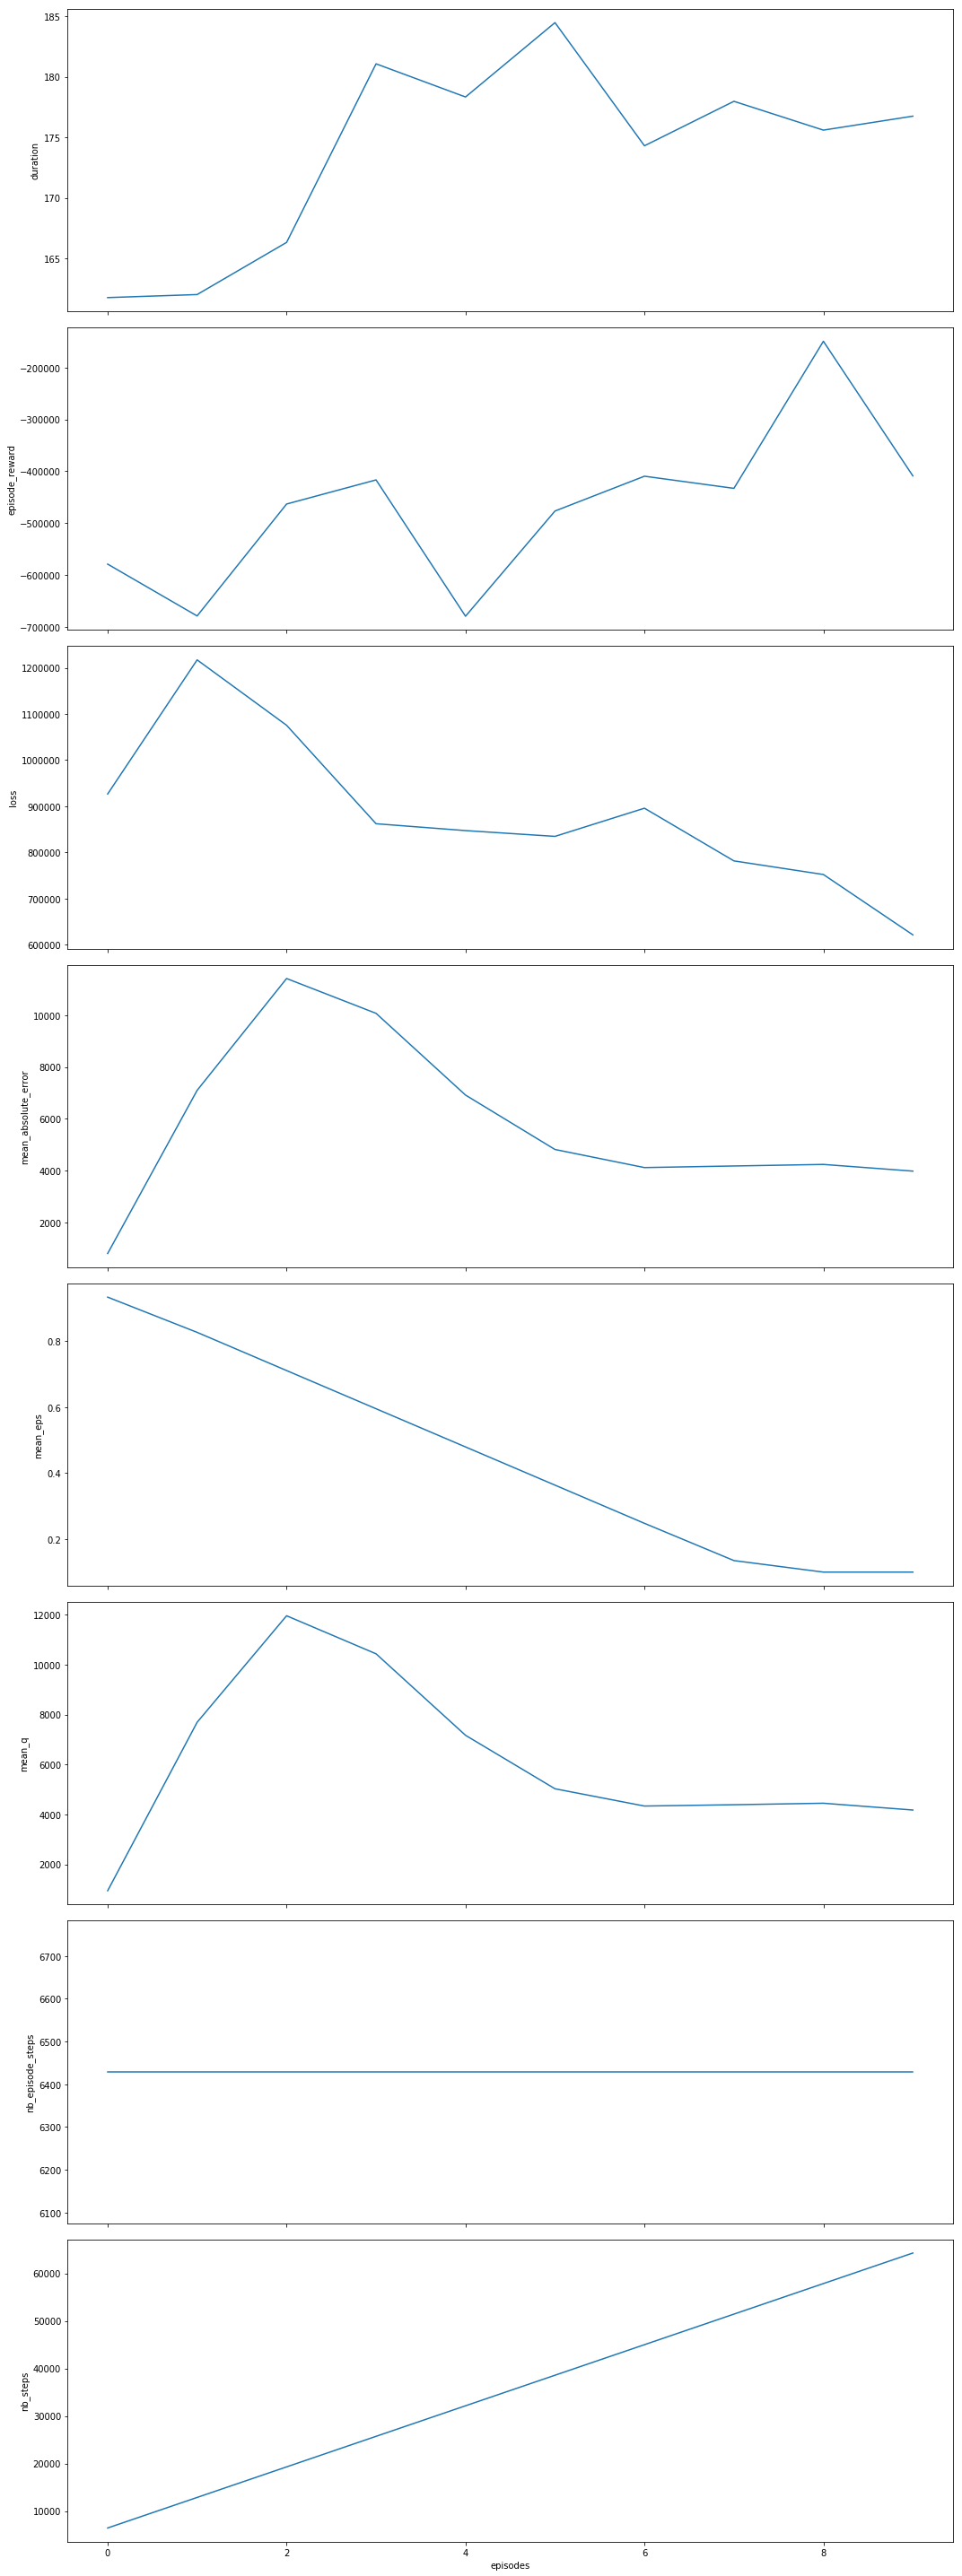

In [5]:
visualize_log(dqqn.log_filename)

In [6]:
result_filename = "./results/sim_result_ep_{}.csv"

def results(filename):
    start = "2016-06-01"
    end = "2018-01-01"

    df = pd.read_csv(filename)
    df = df.groupby(df.index // 3).agg({'timestamp': np.min,
                                        'risk_bal': np.min,
                                        'risk_intr': np.min,
                                        'profit_eur': np.sum,
                                        'imbalance_kwh': np.sum,
                                        'lost_rentals_eur': np.sum,
                                        'charged_vpp_kwh': np.sum,
                                        })

    df["timestamp"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
    df = df.set_index("timestamp")
    df = df[start:end]

    grouper = "week"
    df[grouper] = df.index.week
    
    # sns.lineplot(x="week", y="profit_eur", data=df);
    sns.lineplot(x=grouper, y="risk_bal", data=df, label="Balancing");
    sns.lineplot(x=grouper, y="risk_intr", data=df, label="Intraday");

    print("Profit {:d} EUR".format(int(df["profit_eur"].sum())))
    print("Imbalance {} kWh".format(df["imbalance_kwh"].sum()))
    print("Lost rentals {} EUR".format(df["lost_rentals_eur"].sum()))
    print("Mean Risk Balancing={:.3}, Intraday={:.3}".format(df["risk_bal"].mean(), df["risk_intr"].mean()))
    

Profit 10494 EUR
Imbalance 53.1 kWh
Lost rentals 493.2 EUR
Mean Risk Balancing=0.527, Intraday=0.49


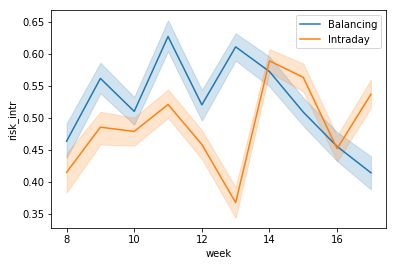

In [7]:
results(result_filename.format(env.episode-1))

In [8]:
dqqn.test()

Testing for 1 episodes ...


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


Episode 1: reward: -127110.580, steps: 6429


Profit 10829 EUR
Imbalance 45.900000000000006 kWh
Lost rentals 240.0 EUR
Mean Risk Balancing=0.609, Intraday=0.433


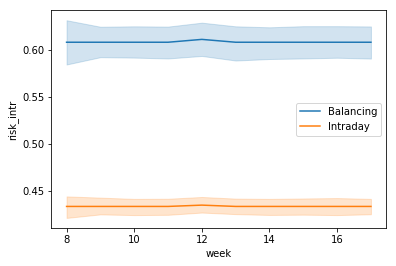

In [9]:
results(result_filename.format("test"))